In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. SAME PARAMETERS 

In [23]:
## SAME PARAMETER ##
beta = 0.33 # Tansmission rate
gamma = 0.14 # Recovery rate
nu = 0.01  # vaccine rate

N = 5_826_529  #Total Population
I0 = 500              # Start Infection
R0_init = 0 #Start recovering from disease
V0 = 0 #Start vaccinated
S0 = N - I0 - R0_init - V0 #Start susceptible


T = 365 #Daily Time Steps
dt = 1 # Simulation updates daily


In [24]:

# Arrays to store results
S = np.zeros(T+1, dtype=int)
I = np.zeros(T+1, dtype=int)
R = np.zeros(T+1, dtype=int)
V = np.zeros(T+1, dtype=int)

# Initial conditions
S[0] = S0
I[0] = I0
R[0] = R0_init
V[0] = V0

In [25]:
# Stochastic simulation
for t in range(T):
    # Probabilities for each transition
    p_infect = 1 - np.exp(-beta * I[t] / N * dt)
    p_recover = 1 - np.exp(-gamma * dt)
    p_vacc = 1 - np.exp(-nu * dt)

    # Events sampled from binomial distributions
    new_infect = np.random.binomial(S[t], p_infect)
    new_recover = np.random.binomial(I[t], p_recover)
    new_vacc = np.random.binomial(S[t] - new_infect, p_vacc)  # only from remaining susceptibles

    # Update states
    S[t+1] = S[t] - new_infect - new_vacc
    I[t+1] = I[t] + new_infect - new_recover
    R[t+1] = R[t] + new_recover
    V[t+1] = V[t] + new_vacc

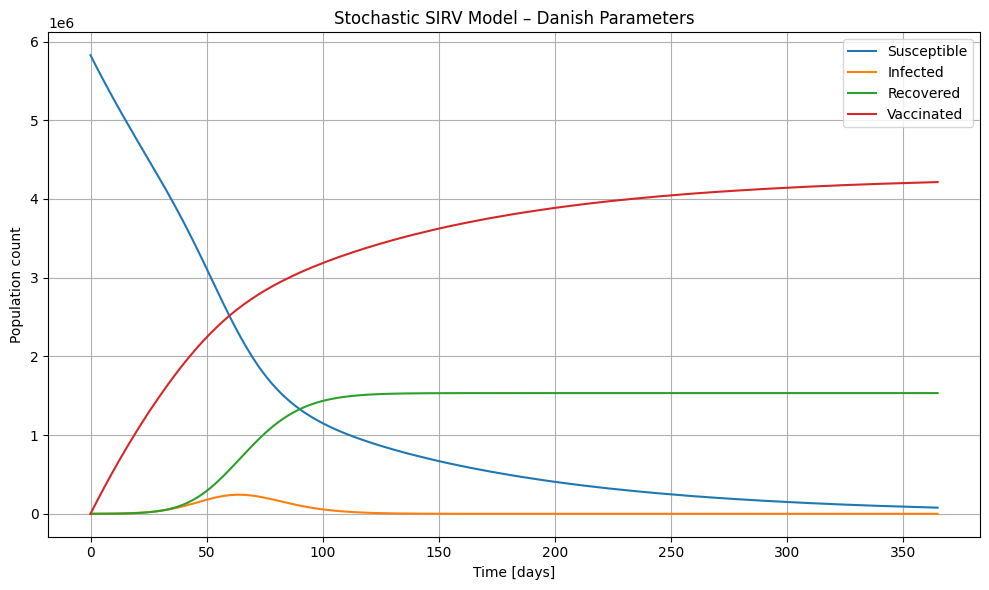

In [26]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.plot(V, label='Vaccinated')
plt.xlabel('Time [days]')
plt.ylabel('Population count')
plt.title('Stochastic SIRV Model – Danish Parameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. PLAYING AROUND WITH PARAMETERS

In [27]:
## PLAYING AROUND PARAMETER ##
beta = 0.33 # Tansmission rate
gamma = 0.14 # Recovery rate
nu = 0.01  # vaccine rate

N = 1000000 #Total Population
I0 = 100 # Start Infection
R0_init = 0 #Start recovering from disease
V0 = 0 #Start vaccinated
S0 = N - I0 - R0_init - V0 #Start susceptible


T = 200 #Daily Time Steps
dt = 1 # Simulation updates daily
